Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

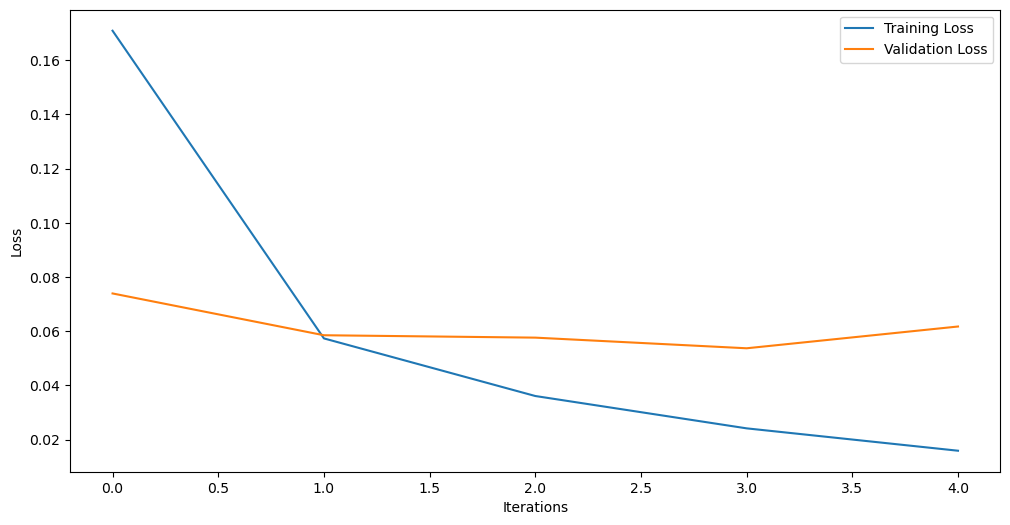

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Further split the training dataset into training and validation
split_ratio = 0.8
split_index = int(len(train_images) * split_ratio)
validation_images, validation_labels = train_images[split_index:], train_labels[split_index:]
train_images, train_labels = train_images[:split_index], train_labels[:split_index]

# Preprocess the data
train_images = train_images / 255.0
validation_images = validation_images / 255.0
test_images = test_images / 255.0

# Define the CNN architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images[..., np.newaxis], train_labels, epochs=5, validation_data=(validation_images[..., np.newaxis], validation_labels))

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images[..., np.newaxis], test_labels)

# Print the accuracy and loss
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

# Generate predictions
predictions = model.predict(test_images[..., np.newaxis])
predicted_labels = np.argmax(predictions, axis=1)

# Create a confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the loss vs. iterations
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

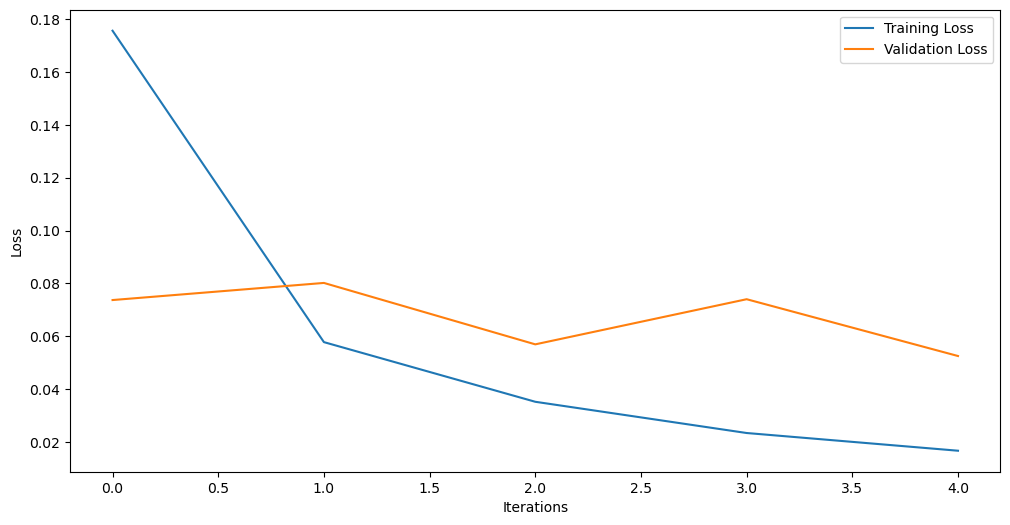

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Further split the training dataset into training and validation
split_ratio = 0.8
split_index = int(len(train_images) * split_ratio)
validation_images, validation_labels = train_images[split_index:], train_labels[split_index:]
train_images, train_labels = train_images[:split_index], train_labels[:split_index]

# Preprocess the data
train_images = train_images / 255.0
validation_images = validation_images / 255.0
test_images = test_images / 255.0

# Define the CNN architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Print the CNN architecture
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images[..., np.newaxis], train_labels, epochs=5, validation_data=(validation_images[..., np.newaxis], validation_labels))

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images[..., np.newaxis], test_labels)

# Print the accuracy and loss for test set
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

# Generate predictions for test set
predictions_test = model.predict(test_images[..., np.newaxis])
predicted_labels_test = np.argmax(predictions_test, axis=1)

# Generate predictions for training set
predictions_train = model.predict(train_images[..., np.newaxis])
predicted_labels_train = np.argmax(predictions_train, axis=1)

# Generate predictions for validation set
predictions_validation = model.predict(validation_images[..., np.newaxis])
predicted_labels_validation = np.argmax(predictions_validation, axis=1)

# Create confusion matrices
conf_matrix_test = confusion_matrix(test_labels, predicted_labels_test)
conf_matrix_train = confusion_matrix(train_labels, predicted_labels_train)
conf_matrix_validation = confusion_matrix(validation_labels, predicted_labels_validation)

# Print the confusion matrices
print("\nConfusion Matrix (Test Set):")
print(conf_matrix_test)

print("\nConfusion Matrix (Training Set):")
print(conf_matrix_train)

print("\nConfusion Matrix (Validation Set):")
print(conf_matrix_validation)

# Plot the loss vs. iterations
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 64)       256       
 hNormalization)                                                 
                                                        

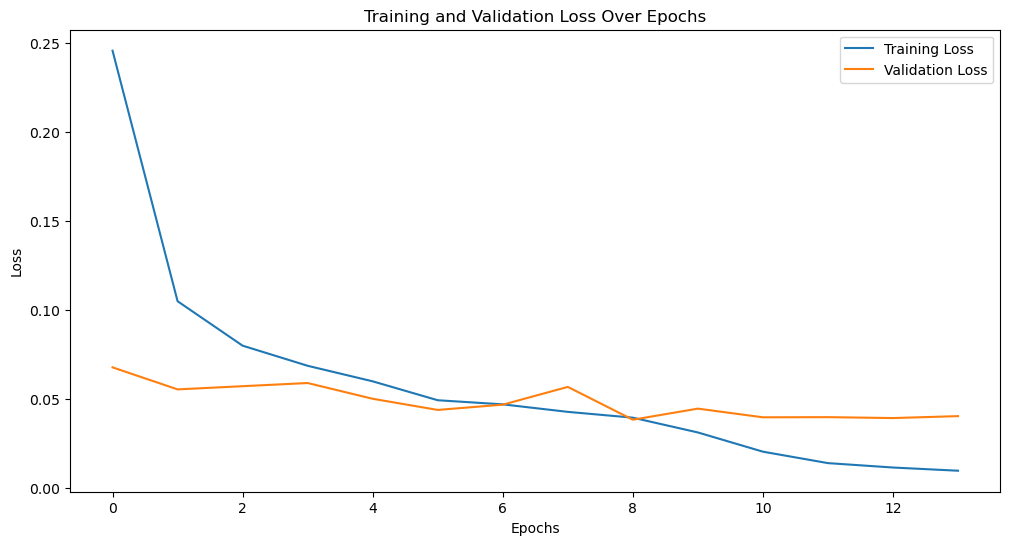

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Split training data into training and validation sets
validation_split = 0.2
split_index = int((1 - validation_split) * len(x_train))
x_train, x_val = x_train[:split_index], x_train[split_index:]
y_train, y_val = y_train[:split_index], y_train[split_index:]

# Define a function to build the CNN model
def build_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    model.add(Dense(10, activation='softmax'))

    return model

model = build_model()
model.summary()

# Define a learning rate scheduler
def learning_rate_scheduler(epoch):
    if epoch < 10:
        return 0.001
    elif epoch < 20:
        return 0.0001
    else:
        return 0.00001

# Early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model with the learning rate scheduler
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=30, validation_data=(x_val.reshape(-1, 28, 28, 1), y_val), callbacks=[early_stopping, LearningRateScheduler(learning_rate_scheduler)])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions
y_pred = model.predict(x_test.reshape(-1, 28, 28, 1))
y_pred_classes = [np.argmax(y) for y in y_pred]

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the training loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Epochs')
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 64)       256       
 hNormalization)                                                 
                                                        

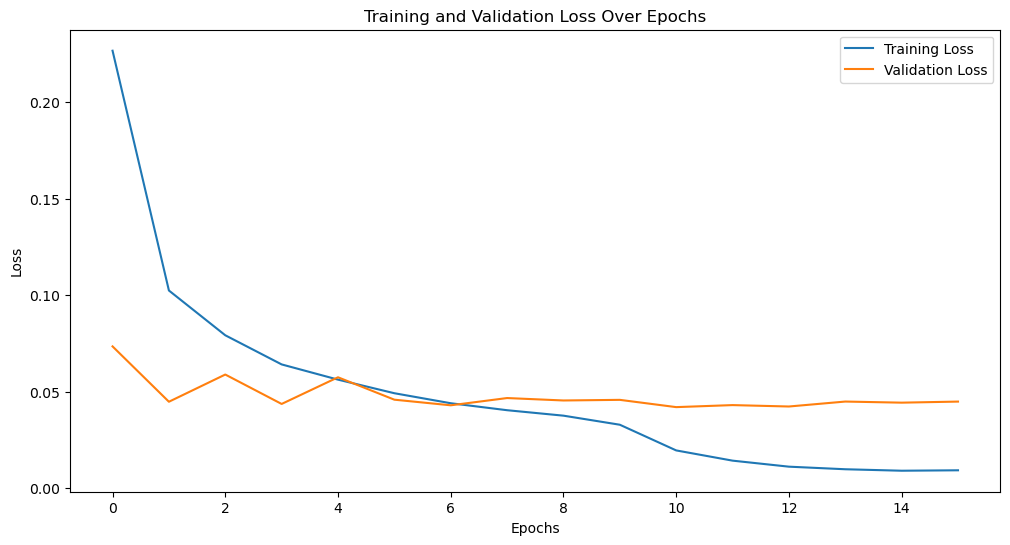

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Split training data into training and validation sets
validation_split = 0.2
split_index = int((1 - validation_split) * len(x_train))
x_train, x_val = x_train[:split_index], x_train[split_index:]
y_train, y_val = y_train[:split_index], y_train[split_index:]

# Define a function to build the CNN model
def build_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    model.add(Dense(10, activation='softmax'))

    return model

model = build_model()
model.summary()

# Define a learning rate scheduler
def learning_rate_scheduler(epoch):
    if epoch < 10:
        return 0.001
    elif epoch < 20:
        return 0.0001
    else:
        return 0.00001

# Early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model with the learning rate scheduler
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=30, validation_data=(x_val.reshape(-1, 28, 28, 1), y_val), callbacks=[early_stopping, LearningRateScheduler(learning_rate_scheduler)])

# Check if early stopping occurred
if early_stopping.stopped_epoch > 0:
    print(f"Early stopping at epoch {early_stopping.stopped_epoch + 1} as validation loss did not improve for {early_stopping.patience} consecutive epochs.")

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions
y_pred = model.predict(x_test.reshape(-1, 28, 28, 1))
y_pred_classes = [np.argmax(y) for y in y_pred]

# Calculate and display the confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix (Test Set):")
print(conf_matrix_test)

# Generate predictions for the training and validation sets
y_train_pred = model.predict(x_train.reshape(-1, 28, 28, 1))
y_val_pred = model.predict(x_val.reshape(-1, 28, 28, 1))

# Calculate and display the confusion matrices for training and validation sets
conf_matrix_train = confusion_matrix(y_train, [np.argmax(y) for y in y_train_pred])
conf_matrix_val = confusion_matrix(y_val, [np.argmax(y) for y in y_val_pred])

print("\nConfusion Matrix (Training Set):")
print(conf_matrix_train)

print("\nConfusion Matrix (Validation Set):")
print(conf_matrix_val)

# Plot the training loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Epochs')
plt.show()

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a function to build the CNN model
def build_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    model.add(Dense(10, activation='softmax'))

    return model

model = build_model()
model.summary()

# Define a learning rate scheduler
def learning_rate_scheduler(epoch):
    if epoch < 10:
        return 0.001
    elif epoch < 20:
        return 0.0001
    else:
        return 0.00001

# Early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 0

# Initialize lists to store results
test_accuracies = []
train_accuracies = []

for train_index, val_index in kf.split(x_train):
    fold += 1
    print(f"Fold {fold}/{kf.get_n_splits()}")

    # Split the data into train and validation sets for this fold
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Compile the model with the learning rate scheduler
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model for this fold
    history = model.fit(x_train_fold.reshape(-1, 28, 28, 1), y_train_fold, epochs=30,
                        validation_data=(x_val_fold.reshape(-1, 28, 28, 1), y_val_fold),
                        callbacks=[early_stopping, LearningRateScheduler(learning_rate_scheduler)],
                        verbose=0)
    
    # Check if early stopping occurred
    if early_stopping.stopped_epoch > 0:
        print(f"Early stopping at epoch {early_stopping.stopped_epoch + 1} as validation loss did not improve for {early_stopping.patience} consecutive epochs.")
    
    # Evaluate the model on the training set for this fold
    train_loss, train_accuracy = model.evaluate(x_train_fold.reshape(-1, 28, 28, 1), y_train_fold)
    print(f"Training Accuracy (Fold {fold}): {train_accuracy:.4f}")
    train_accuracies.append(train_accuracy)
    
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)
    print(f"Test Accuracy (Fold {fold}): {test_accuracy:.4f}")
    test_accuracies.append(test_accuracy)

    # Generate predictions for the test set
    y_pred = model.predict(x_test.reshape(-1, 28, 28, 1))
    y_pred_classes = [np.argmax(y) for y in y_pred]

    # Calculate and display the confusion matrix for the test set
    conf_matrix_test = confusion_matrix(y_test, y_pred_classes)
    print(f"Confusion Matrix (Test Set - Fold {fold}):")
    print(conf_matrix_test)

# Print the average test and train accuracies across folds
print(f"Average Training Accuracy: {np.mean(train_accuracies):.4f}")
print(f"Average Test Accuracy: {np.mean(test_accuracies):.4f}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 64)       256       
 hNormalization)                                                 
                                                        

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 64)       256       
 hNormalization)                                                 
                                                        

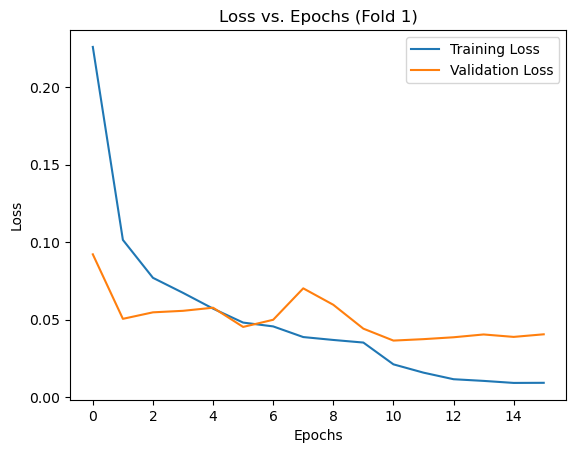

1500/1500 [==============================] - 9s 6ms/step - loss: 0.0040 - accuracy: 0.9989
Training Accuracy (Fold 1): 0.9989
313/313 [==============================] - 3s 8ms/step - loss: 0.0273 - accuracy: 0.9926
Test Accuracy (Fold 1): 0.9926
Confusion Matrix (Test Set - Fold 1):
[[ 977    0    1    0    0    0    1    1    0    0]
 [   0 1132    1    0    0    2    0    0    0    0]
 [   1    0 1022    1    1    0    1    6    0    0]
 [   0    0    2 1006    0    1    0    0    1    0]
 [   0    0    0    0  979    0    0    0    0    3]
 [   2    0    0    4    0  884    1    0    0    1]
 [   4    3    0    0    2    3  946    0    0    0]
 [   0    2    3    0    2    0    0 1019    1    1]
 [   2    0    3    1    1    0    1    0  965    1]
 [   0    1    0    0    4    4    0    1    3  996]]
Fold 2/5
Early stopping at epoch 6 as validation loss did not improve for 5 consecutive epochs.


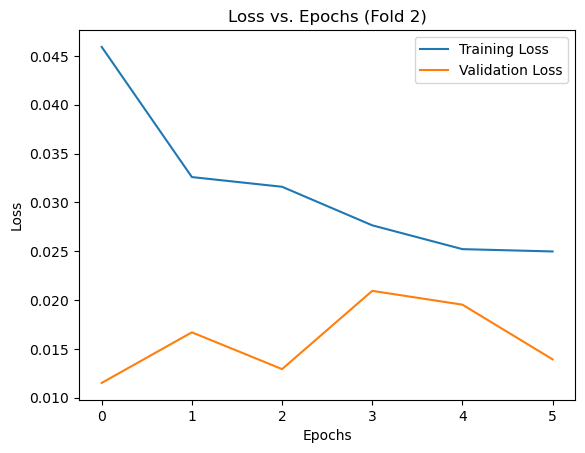

1500/1500 [==============================] - 8s 6ms/step - loss: 0.0112 - accuracy: 0.9966
Training Accuracy (Fold 2): 0.9966
313/313 [==============================] - 2s 7ms/step - loss: 0.0329 - accuracy: 0.9916
Test Accuracy (Fold 2): 0.9916
Confusion Matrix (Test Set - Fold 2):
[[ 975    0    2    0    0    0    1    1    0    1]
 [   0 1132    1    0    0    2    0    0    0    0]
 [   1    0 1024    1    1    0    1    1    3    0]
 [   0    0    1 1005    0    3    0    0    1    0]
 [   0    0    1    0  968    0    1    1    5    6]
 [   2    0    0    7    0  881    1    0    0    1]
 [   1    2    0    0    0    1  953    0    1    0]
 [   0    3    6    0    1    0    0 1015    1    2]
 [   0    0    1    0    1    0    1    0  968    3]
 [   0    1    0    0    2    2    0    1    8  995]]
Fold 3/5
Early stopping at epoch 7 as validation loss did not improve for 5 consecutive epochs.


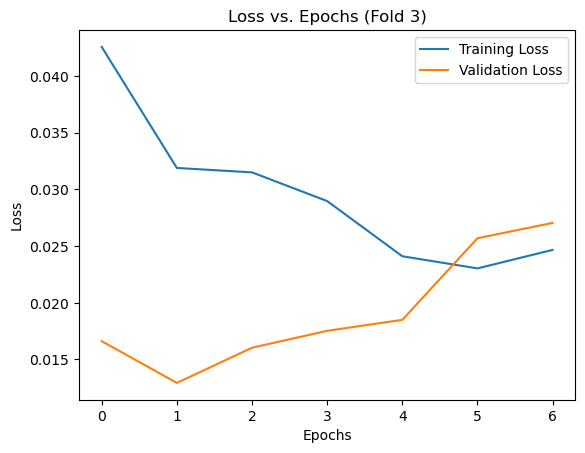

1500/1500 [==============================] - 9s 6ms/step - loss: 0.0089 - accuracy: 0.9972
Training Accuracy (Fold 3): 0.9972
313/313 [==============================] - 2s 7ms/step - loss: 0.0300 - accuracy: 0.9926
Test Accuracy (Fold 3): 0.9926
Confusion Matrix (Test Set - Fold 3):
[[ 974    0    1    0    0    0    3    1    1    0]
 [   0 1130    1    3    0    1    0    0    0    0]
 [   1    0 1028    0    1    0    0    2    0    0]
 [   0    0    2 1004    0    2    0    1    1    0]
 [   0    0    0    0  977    0    0    1    0    4]
 [   1    0    0    4    0  880    4    0    3    0]
 [   1    2    0    0    0    1  953    0    1    0]
 [   0    3    6    0    0    0    0 1016    0    3]
 [   2    0    2    1    1    0    0    0  967    1]
 [   0    1    0    0    6    1    0    1    3  997]]
Fold 4/5
Early stopping at epoch 6 as validation loss did not improve for 5 consecutive epochs.


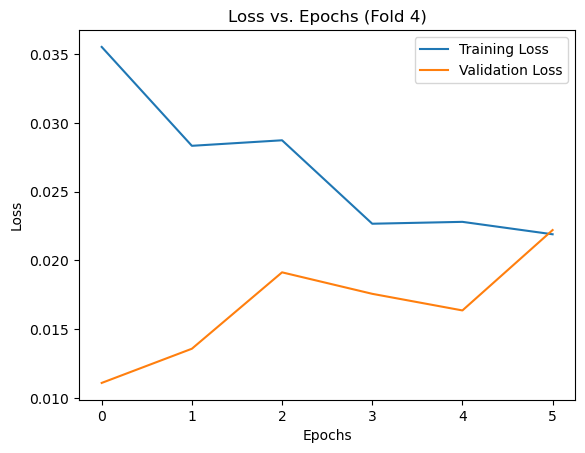

1500/1500 [==============================] - 9s 6ms/step - loss: 0.0083 - accuracy: 0.9973
Training Accuracy (Fold 4): 0.9973
313/313 [==============================] - 2s 7ms/step - loss: 0.0326 - accuracy: 0.9922
Test Accuracy (Fold 4): 0.9922
Confusion Matrix (Test Set - Fold 4):
[[ 978    0    1    0    0    0    0    1    0    0]
 [   0 1132    0    2    0    1    0    0    0    0]
 [   0    0 1026    1    0    0    0    5    0    0]
 [   0    1    0 1006    0    1    0    2    0    0]
 [   0    0    0    0  970    0    0    2    1    9]
 [   1    0    0   15    0  874    1    0    0    1]
 [   2    3    0    0    0    2  947    0    4    0]
 [   0    2    2    0    1    0    0 1021    1    1]
 [   0    0    0    1    0    0    0    2  970    1]
 [   0    0    0    1    4    2    0    1    3  998]]
Fold 5/5
Early stopping at epoch 6 as validation loss did not improve for 5 consecutive epochs.


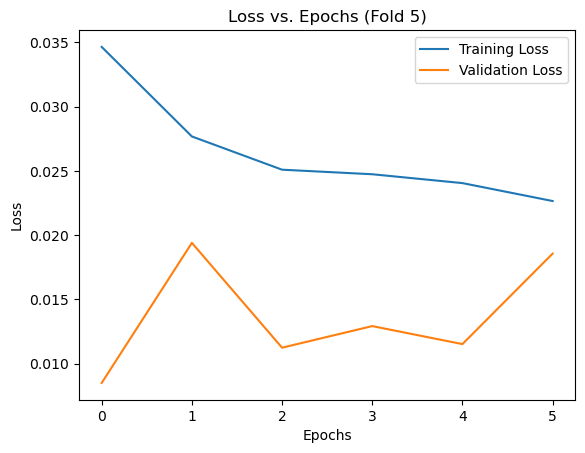

1500/1500 [==============================] - 9s 6ms/step - loss: 0.0086 - accuracy: 0.9977
Training Accuracy (Fold 5): 0.9977
313/313 [==============================] - 2s 7ms/step - loss: 0.0406 - accuracy: 0.9929
Test Accuracy (Fold 5): 0.9929
Confusion Matrix (Test Set - Fold 5):
[[ 978    0    1    0    0    0    0    1    0    0]
 [   0 1132    0    1    0    2    0    0    0    0]
 [   1    1 1028    0    1    0    0    1    0    0]
 [   0    0    2 1004    0    1    0    2    1    0]
 [   0    0    0    0  977    0    1    1    1    2]
 [   2    0    0    5    0  883    1    0    0    1]
 [   1    4    0    0    1    1  950    0    1    0]
 [   0    3    5    0    1    0    0 1017    0    2]
 [   2    0    2    1    1    2    0    0  965    1]
 [   0    1    0    0    7    0    0    2    4  995]]
Average Test Accuracy: 0.9924
Average Training Accuracy: 0.9975


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a function to build the CNN model
def build_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    model.add(Dense(10, activation='softmax'))

    return model

model = build_model()
model.summary()

# Define a learning rate scheduler
def learning_rate_scheduler(epoch):
    if epoch < 10:
        return 0.001
    elif epoch < 20:
        return 0.0001
    else:
        return 0.00001

# Early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 0

# Initialize lists to store results
test_accuracies = []
train_accuracies = []

for train_index, val_index in kf.split(x_train):
    fold += 1
    print(f"Fold {fold}/{kf.get_n_splits()}")

    # Split the data into train and validation sets for this fold
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Compile the model with the learning rate scheduler
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model for this fold
    history = model.fit(x_train_fold.reshape(-1, 28, 28, 1), y_train_fold, epochs=30,
                        validation_data=(x_val_fold.reshape(-1, 28, 28, 1), y_val_fold),
                        callbacks=[early_stopping, LearningRateScheduler(learning_rate_scheduler)],
                        verbose=0)

    # Check if early stopping occurred
    if early_stopping.stopped_epoch > 0:
        print(f"Early stopping at epoch {early_stopping.stopped_epoch + 1} as validation loss did not improve for {early_stopping.patience} consecutive epochs.")

    # Plot loss vs. epochs for this fold
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Loss vs. Epochs (Fold {fold})')
    plt.legend()
    plt.show()

    # Evaluate the model on the training set for this fold
    train_loss, train_accuracy = model.evaluate(x_train_fold.reshape(-1, 28, 28, 1), y_train_fold)
    print(f"Training Accuracy (Fold {fold}): {train_accuracy:.4f}")
    train_accuracies.append(train_accuracy)
    
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)
    print(f"Test Accuracy (Fold {fold}): {test_accuracy:.4f}")
    test_accuracies.append(test_accuracy)

    # Generate predictions for the test set
    y_pred = model.predict(x_test.reshape(-1, 28, 28, 1))
    y_pred_classes = [np.argmax(y) for y in y_pred]

    # Calculate and display the confusion matrix for the test set
    conf_matrix_test = confusion_matrix(y_test, y_pred_classes)
    print(f"Confusion Matrix (Test Set - Fold {fold}):")
    print(conf_matrix_test)

# Print the average test and train accuracies across folds
print(f"Average Test Accuracy: {np.mean(test_accuracies):.4f}")
print(f"Average Training Accuracy: {np.mean(train_accuracies):.4f}")

Fold 1/5 - Learning Rate: 0.1, Dropout Rate: 0.3
Early stopping at epoch 18 as validation loss did not improve for 5 consecutive epochs.
313/313 [==============================] - 4s 10ms/step - loss: 0.0291 - accuracy: 0.9933
Test Accuracy (Fold 1): 0.9933
Fold 2/5 - Learning Rate: 0.1, Dropout Rate: 0.3
Early stopping at epoch 19 as validation loss did not improve for 5 consecutive epochs.
313/313 [==============================] - 3s 7ms/step - loss: 0.0325 - accuracy: 0.9932
Test Accuracy (Fold 2): 0.9932
Fold 3/5 - Learning Rate: 0.1, Dropout Rate: 0.3
Early stopping at epoch 10 as validation loss did not improve for 5 consecutive epochs.
313/313 [==============================] - 3s 10ms/step - loss: 0.0334 - accuracy: 0.9898
Test Accuracy (Fold 3): 0.9898
Fold 4/5 - Learning Rate: 0.1, Dropout Rate: 0.3
Early stopping at epoch 13 as validation loss did not improve for 5 consecutive epochs.
313/313 [==============================] - 4s 12ms/step - loss: 0.0304 - accuracy: 0.9917


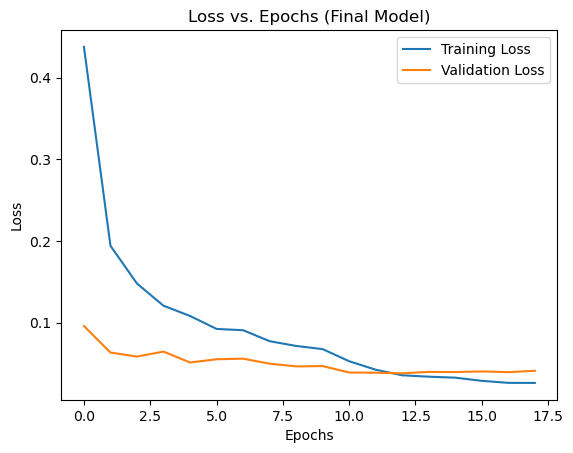

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a function to build the CNN model with hyperparameters
def build_model(learning_rate=0.001, dropout_rate=0.5):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))  # Dropout for regularization
    model.add(Dense(10, activation='softmax'))

    # Compile the model with the specified learning rate
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Define a learning rate scheduler
def learning_rate_scheduler(epoch):
    if epoch < 10:
        return 0.001
    elif epoch < 20:
        return 0.0001
    else:
        return 0.00001

# Early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Initialize k-fold cross-validation for hyperparameter tuning
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store hyperparameters and corresponding test accuracies
hyperparameters = []
test_accuracies = []

# Hyperparameter tuning loop
for learning_rate in [0.1, 0.01, 0.001, 0.0001]:
    for dropout_rate in [0.3, 0.5, 0.7]:
        fold = 0
        fold_test_accuracies = []

        for train_index, val_index in kf.split(x_train):
            fold += 1
            print(f"Fold {fold}/{kf.get_n_splits()} - Learning Rate: {learning_rate}, Dropout Rate: {dropout_rate}")

            # Split the data into train and validation sets for this fold
            x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

            model = build_model(learning_rate=learning_rate, dropout_rate=dropout_rate)

            # Train the model for this fold
            history = model.fit(x_train_fold.reshape(-1, 28, 28, 1), y_train_fold, epochs=30,
                                validation_data=(x_val_fold.reshape(-1, 28, 28, 1), y_val_fold),
                                callbacks=[early_stopping, LearningRateScheduler(learning_rate_scheduler)],
                                verbose=0)

            # Check if early stopping occurred
            if early_stopping.stopped_epoch > 0:
                print(f"Early stopping at epoch {early_stopping.stopped_epoch + 1} as validation loss did not improve for {early_stopping.patience} consecutive epochs.")
            
            # Evaluate the model on the test set
            test_loss, test_accuracy = model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)
            print(f"Test Accuracy (Fold {fold}): {test_accuracy:.4f}")
            fold_test_accuracies.append(test_accuracy)

        # Calculate the mean test accuracy for this hyperparameter combination
        mean_test_accuracy = np.mean(fold_test_accuracies)

        # Store the hyperparameters and mean test accuracy
        hyperparameters.append((learning_rate, dropout_rate))
        test_accuracies.append(mean_test_accuracy)

# Find the best hyperparameter combination based on test accuracy
best_hyperparameters = hyperparameters[np.argmax(test_accuracies)]
best_learning_rate, best_dropout_rate = best_hyperparameters

# Train the final model on the entire training dataset with the best hyperparameters
final_model = build_model(learning_rate=best_learning_rate, dropout_rate=best_dropout_rate)
final_model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=30,
                callbacks=[early_stopping, LearningRateScheduler(learning_rate_scheduler)],
                verbose=1)

# Evaluate the final model on the test set
final_test_loss, final_test_accuracy = final_model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)
print(f"Final Test Accuracy: {final_test_accuracy:.4f}")

# Generate predictions for the test set
y_pred = final_model.predict(x_test.reshape(-1, 28, 28, 1))
y_pred_classes = [np.argmax(y) for y in y_pred]

# Calculate and display the confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix (Test Set):")
print(conf_matrix_test)

# Print the best hyperparameters
print(f"Best Learning Rate: {best_learning_rate}")
print(f"Best Dropout Rate: {best_dropout_rate}")

# Print the model architecture
final_model.summary()

# Plot loss vs. epochs for the final model
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs (Final Model)')
plt.legend()
plt.show()

In [ ]:
'''References: 
https://github.com/mattburtnz07/PyTorch-Convolution-Neural-Network/blob/master/beginners-guide-to-pytorch-cnn-s-by-a-beginner.ipynb
https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
'''